# this notebook represents long-term forecasting(3years) with monthly resolution using ML models

refs:


1.   https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
2.   (sklearn)https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1
3.   https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55
4.   https://stackoverflow.com/questions/63517126/any-way-to-predict-monthly-time-series-with-scikit-learn-in-python
5.   https://paperswithcode.com/paper/forecasting-foreign-exchange-rate-a
6. https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb
7. https://arxiv.org/pdf/2005.08067.pdf (sktime paper-metrics p9)








fine tuning RF : 

*   https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
*   xgboost: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
* to read: https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d 



Regarding a machine learning paper, consider starting by reviewing papers related to your work (Google Scholar may help) and write a section about it (keep in mind how your work relates to them and what innovation it brings to the field, and write about it). Then write sections for describing your dataset(s), for describing your algorithms and methodology, and why you have selected them. Also, don’t forget to write about your results (you will see how a machine learning paper is organized by reviewing other papers anyway).

At the end, get ready to answer the reviews you will receive some time after submitting.

It would be easier if you already have academic experience on researching or if you have a professor or experienced researcher to advise you with that. Also, at least talk to someone with academic experience to advise you WHERE you should submit your paper, given your work subject.

In summary: yes, you can! But it will be a lot easier if you have an advisor, at least…




One also needs to choose the journal which is most suited to the subject field of the article. Is the article a review article or a piece of original investigation? Does the study provide incremental gains in knowledge or is there something exceptionally novel to report? Journals and fields will vary in what they consider appropriate and which formats they publish.

Depending on the journal, choosing an appropriate editor(s) is the final step. There may be a list of editors and reviewers to choose from and it makes sense to choose someone who works in a closely related field.

The stages of publishing research may differ by field and publisher, but broadly you'll follow these steps:

Do the research
Decide what research results you want to publish together as an account of your research findings. This should be decided independently of the direction of the results, i.e. whether or not you got the results you wanted.
Discuss authorship with those who contributed to the research
Draft the text, tables and figures and work with all the authors on revising and editing the paper. Anyone involved in this process who is not an author should be acknowledged.
Optionally, get feedback from colleagues about the manuscript
Optionally, get the paper edited by a language editing service
Get approval from all the authors of the version to be submitted
Agree among the authors where you will submit and how any page charges or article processing charges will be paid
Have the underlying data and any code ready to share on request or ideally deposit this publicly. Also have documentation such as of ethics approval ready.
Prepare a cover letter and the manuscript files
Read the instructions for authors of the target journal, check you comply with their policies
Submit the article via the online submission
The article will undergo different initials checks / triage depending on the journal, such as scope or issues like reporting.
If the paper is not rejected, it will be assigned to an editor, either a staff editor or an academic editor. In some journals, the Editor-in-Chief decides this allocation.
The editor will decide if the paper is suitable for peer review. If not, they may reject the paper (often called a “desk reject”) or ask for revisions. Some journals discuss decisions or require approval by the EiC or a section editor, others give individual editors autonomy in their decisions.
Most journals require peer review before a paper can be accepted, though some rely on editorial review. Peer reviewers are experts in the topic and/or methods of the research. They may be selected from a database of reviewers, researchers the editors knows of themselves, or chosen based on their publication record.
Potential reviewers are asked to review, usually by email but occasionally by phone. If they agree, they will be sent the paper and given anything from a few days to several weeks to submit their review. The number of reviewers is usually two or three, but can vary. If reviewers decline, they may suggest alternatives. Publishing staff often support editors in this process.
Reviewers will usually send their comments via the online system or email. They might be asked to answer specific questions and are often asked about their recommendation (accept/revise/reject).
Once the editor has enough reviews, they will make their decision based on the reviews, the journal guidelines, and their own assessment of the paper and the reviewers' expertise. The editor may be able to overrule the reviewers. Their decision might need to be approved or discussed. They will send their decision, usually by email, to the authors.
If the article needs revisions, the authors will be asked to resubmit by a certain date. That deadline can often be extended. Authors might need to do more research, a reanalysis, or revise the language.
If the article is rejected, the authors might appeal the decision or be allowed to resubmit to the same journal if they address all the editor and reviewer concerns. Otherwise, go back to step 10 at the next journal of the authors' choice.
If revised, editor might make the next decision themselves or send the paper for re-review
Once accepted, the paper might be posted publicly as an “in press” version or this might wait until production is complete
During production, typesetting, formatting, copyediting and other checks will be performed by the publisher
The final article is then formally published, usually as HTML and/or PDF, and sent to indexing services

In [ ]:
#ref 1
#make zoom on pred vs test data
#make cross-correlation between pred-test data
#dont be overconfident with traditional accuracy metrics : r2, mae,...
#ref2
#A better alternative for cross validation on time series data (than K-fold CV) is 
#Forward Chaining strategy.

#sktime tuto github [6]
#1.2.1, 1.2.2, 1.3, 1.4.1, 3.3(tuning), 3.4 (ensembling)
#LSTM can overcome the problem of back-propagated error decay through memory blocks of LSTM. In 
#contrast, MLP) models very often face the problem ofoverfitting, backpropagated error decay, 
#and it cannot automatically determine the optimal time lags while fitting time-series data[5]

#ML mastery: xgboost, Random Forest

In [ ]:

from numpy import argsort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import sklearn
from sklearn import metrics
import numpy as np
import matplotlib.dates as mdates

In [ ]:
#read multivariate data
df=pd.read_csv('/content/clean_monthly_df_human.csv')
df.time=pd.to_datetime(df.time,dayfirst=True)
df.columns

Index(['time', 'MIN_TEMPERATURE_C_t_36', 'max_clients_month_t_36',
       'total_Holiday_Food_Related_t_36', 'total_consommation_t_36',
       'max_pdl_total_daily_load_t_36', 'max_pdl_daily_load_t_36',
       'MIN_TEMPERATURE_C_t', 'max_clients_month_t',
       'total_Holiday_Food_Related_t', 'max_pdl_daily_load_t'],
      dtype='object')

In [ ]:
data=pd.read_csv('/content/clean_monthly_df_human.csv',
                 index_col='time')[['MIN_TEMPERATURE_C_t_36', 'max_clients_month_t_36',
       'total_Holiday_Food_Related_t_36', 'total_consommation_t_36',
       'max_pdl_total_daily_load_t_36', 'max_pdl_daily_load_t_36',
       
       'MIN_TEMPERATURE_C_t', 'max_clients_month_t',
       'total_Holiday_Food_Related_t', 'max_pdl_daily_load_t']].dropna()


In [ ]:
data.shape

(31, 10)

In [ ]:
data.index=pd.to_datetime(data.index,dayfirst=True)

In [ ]:
data.head()

,MIN_TEMPERATURE_C_t_36,max_clients_month_t_36,total_Holiday_Food_Related_t_36,total_consommation_t_36,max_pdl_total_daily_load_t_36,max_pdl_daily_load_t_36,MIN_TEMPERATURE_C_t,max_clients_month_t,total_Holiday_Food_Related_t,max_pdl_daily_load_t
time,,,,,,,,,,
2018-01-31,8.0,3980.0,2.0,247497.63,22257.0,1479.0,11.0,4869.0,1.0,1447.0
2018-02-28,11.0,4023.0,0.0,263249.88,22242.0,1494.0,11.0,4901.0,0.0,1472.0
2018-03-31,12.0,4060.0,0.0,246311.89,21691.0,1551.0,11.0,4943.0,0.0,1307.0
2018-04-30,14.0,4094.0,0.0,237177.99,16752.0,1253.0,15.0,4964.0,0.0,1232.0
2018-05-31,19.0,4112.0,0.0,229106.03,12318.0,1123.0,17.0,5020.0,15.0,1494.0


In [ ]:
data.tail()

,MIN_TEMPERATURE_C_t_36,max_clients_month_t_36,total_Holiday_Food_Related_t_36,total_consommation_t_36,max_pdl_total_daily_load_t_36,max_pdl_daily_load_t_36,MIN_TEMPERATURE_C_t,max_clients_month_t,total_Holiday_Food_Related_t,max_pdl_daily_load_t
time,,,,,,,,,,
2020-03-31,12.0,4640.0,0.0,281676.57,17035.0,1276.0,9.0,5321.0,0.0,1463.0
2020-04-30,15.0,4654.0,0.0,236206.38,15536.0,1200.0,12.0,5324.0,7.0,1599.0
2020-05-31,19.0,4688.0,5.0,224129.16,13926.0,1271.0,18.0,5326.0,26.0,1400.0
2020-06-30,22.0,4705.0,28.0,201208.24,10850.0,1201.0,20.0,5324.0,0.0,1105.0
2020-07-31,25.0,4733.0,0.0,202995.06,9615.0,892.0,23.0,5277.0,1.0,1084.0


# data scaling made difference and improved the performance of some ML models (KNN, SVR, Ridge), but scaling is not required for decision tree based models (decision tree, random forest, xgboost,..) https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
features.shape

(31, 9)

In [ ]:
# split into train and test sets

n_train_days = -7

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  rmse=np.sqrt(metrics.mean_squared_error(y_true, y_pred))
  print(f'RMSE is : {rmse}')
  mape=mean_absolute_percentage_error(y_true, y_pred)
  print(f'MAPE is : {mape} %')
  r2=metrics.r2_score(y_true, y_pred)
  print(f'R2 is : {r2}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  #model_scores[model_name] = [rmse, mape, r2]
  return

In [ ]:
!pip install xgboost

LR: -3.130378 (3.141949)
Ridge R: 0.566296 (0.178686)
lasso: -0.077513 (0.012717)
elastic net: -0.077513 (0.012717)
NN: -0.503156 (0.405610)
KNN: 0.567944 (0.070426)
RF: 0.307490 (0.217689)
SVR: 0.563043 (0.193943)
Xgboost: 0.220910 (0.360185)


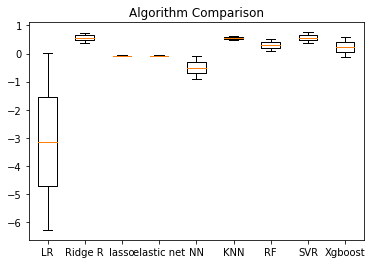

In [ ]:
# ML models to test
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge R',Ridge()))
models.append(('lasso',linear_model.Lasso()))
models.append(('elastic net',ElasticNet()))
#models.append(('GP',GaussianProcessRegressor())) (very poor)
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 1000))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('Xgboost',XGBRegressor(objective='reg:squarederror', n_estimators=1000)))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=2)#4seasons in year
    #n_splits=3 : because in train data there are 3 steps of prediction
    #1-2016 features -->predict 2017; 2-16,17-->predict 18; 3-16,17,18-->predict 19
  cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# the best models are: ridge,KNN, SVR

# Ridge

In [ ]:
model = Ridge()
param_search = { 
    'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'solver': ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']

}
tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [ ]:
best_model

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [ ]:
best_score

0.3768762488081535

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
#overall performance
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 8532.286723238152
MAE is : 73.77031226997948
RMSE is : 92.3703779533144
MAPE is : 5.5430548498122105 %
R2 is : 0.766632775833555

SMAPE is : 0.757435910771064

MASE is : 0.5733443958806694


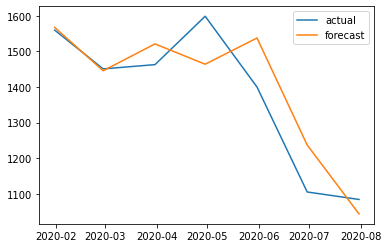

In [ ]:
# plot real vs predictions
time=data.index[-7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

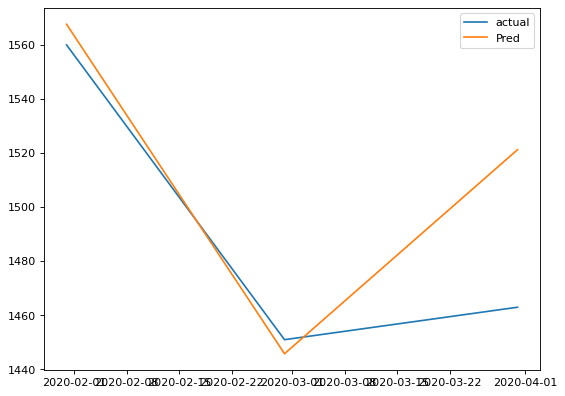

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[:3],inv_y[:3],label='actual')
plt.plot(time[:3],inv_yhat[:3],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[:3], inv_yhat[:3])

Evaluation metric results:-
MSE is : 1159.7888981334436
MAE is : 23.700314384074698
RMSE is : 34.05567350873336
MAPE is : 1.61013466579299 %
R2 is : 0.5130120330689096

SMAPE is : 0.5261652061802159

MASE is : 0.3917407336210693


# **same methodology is repeated**

# SVR

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = SVR()
param_search = { 
    #'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3],
    'gamma' : ['scale','auto'],
    'C' : [0.5,1,1.5,2],
    'epsilon':[0.00001,0.0001,0.001],
    'shrinking':[True,False]
}
tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


SVR(C=1.5, cache_size=200, coef0=0.0, degree=1, epsilon=1e-05, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
best_score

0.664970537172465

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 8901.384531410735
MAE is : 79.49363685737735
RMSE is : 94.34714903700447
MAPE is : 5.982179288294337 %
R2 is : 0.7565375535639424

SMAPE is : 0.8227949393566538

MASE is : 0.6178261931920519


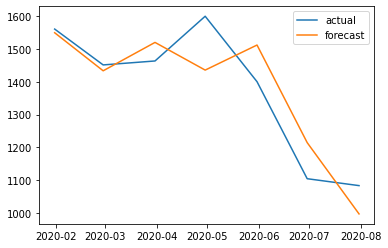

In [ ]:
# plot real vs predictions
time=data.index[-7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

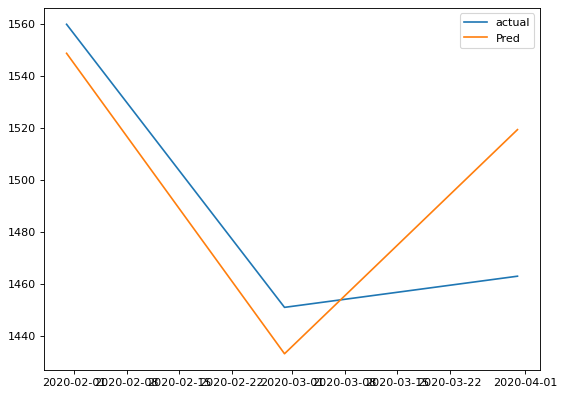

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[:3],inv_y[:3],label='actual')
plt.plot(time[:3],inv_yhat[:3],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (january to march)
timeseries_evaluation_metrics_func(inv_y[:3], inv_yhat[:3])

Evaluation metric results:-
MSE is : 1209.8060320765424
MAE is : 28.491037554221595
RMSE is : 34.78226605723874
MAPE is : 1.9349820601949748 %
R2 is : 0.4920101572880059

SMAPE is : 0.6348688600932174

MASE is : 0.4709262405656462


# KNN

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = KNeighborsRegressor()
param_search = { 
    'n_neighbors': [1,2,3,4,5,6],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[1,2,3],
    'p':[1,2]
}
tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


KNeighborsRegressor(algorithm='ball_tree', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                    weights='distance')

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 5588.78566741618
MAE is : 56.924076019692784
RMSE is : 74.75818127413334
MAPE is : 3.964336278283059 %
R2 is : 0.8471406974505488

SMAPE is : 0.5970311874152837

MASE is : 0.44241509859864847


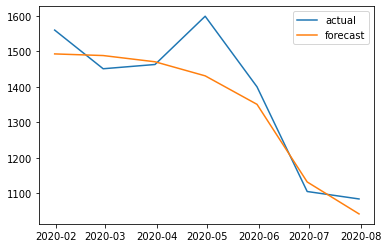

In [ ]:
# plot real vs predictions
time=data.index[-7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

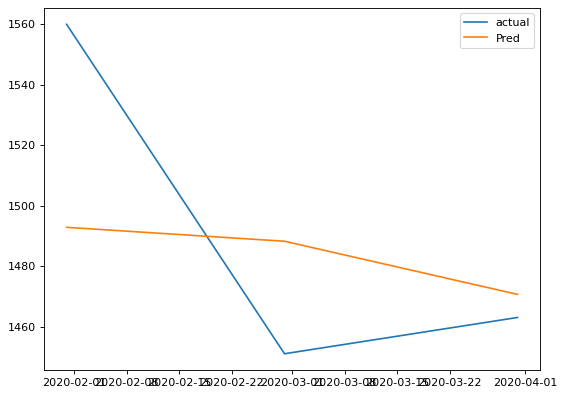

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[:3],inv_y[:3],label='actual')
plt.plot(time[:3],inv_yhat[:3],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[:3], inv_yhat[:3])

Evaluation metric results:-
MSE is : 1985.673944668074
MAE is : 37.34845293538903
RMSE is : 44.560901524408976
MAPE is : 2.4647073989036357 %
R2 is : 0.16622816543749808

SMAPE is : 0.8368757644177904

MASE is : 0.6173298005849426


In [ ]:
best_model.kneighbors()

AttributeError: ignored

# ensembling



*   Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,normalize=False, random_state=None, solver='lsqr', tol=0.001)
*   SVR(C=1.5, cache_size=200, coef0=0.0, degree=1, epsilon=1e-05, gamma='auto',kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets

n_train_days = -7 #n_train_months

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
# get a list of base models
def get_models():
  models = list()
  models.append(('ridge', Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
                                normalize=False, random_state=None, solver='lsqr', tol=0.001)))

  models.append(('svr', SVR(C=1.5, cache_size=200, coef0=0.0, degree=1, epsilon=1e-05, gamma='auto',
                            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)))
  return models


In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
  scores = list()
  for name, model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    yhat=yhat.reshape(yhat.shape[0],1)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
    inv_yhat = concatenate((X_test,yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]
    y_test = y_test.reshape((len(y_test), 1))
    inv_y = concatenate((X_test,y_test), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    mae = mean_absolute_error(inv_y, inv_yhat)
    scores.append(-mae)
  return scores


In [ ]:
# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)
ranking = 1 + argsort(argsort(scores))
print(ranking)

[-73.77031226997954, -79.49363685737735]
[2 1]


In [ ]:

# create the ensemble
weighted_ensemble = VotingRegressor(estimators=models, weights=ranking)
#verbose --> time consumed while fitting will be printed
# fit the ensemble on the training dataset
weighted_ensemble.fit(X_train, y_train)
# make predictions on test set
weighted_yhat = weighted_ensemble.predict(X_test)
yhat=weighted_yhat.reshape(weighted_yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
weighted_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# evaluate predictions using MAE (Mean absolute error)
score = mean_absolute_error(inv_y, weighted_inv_yhat)
print('Weighted Avg MAE: %.3f' % (score))
# evaluate each standalone model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
for i in range(len(models)):
	print('>%s: %.3f' % (models[i][0], -scores[i]))



Weighted Avg MAE: 74.614
>ridge: 73.770
>svr: 79.494


In [ ]:

# evaluate equal weighting (simple average ensemble)
average_ensemble = VotingRegressor(estimators=models)
average_ensemble.fit(X_train, y_train)
average_yhat = average_ensemble.predict(X_test)

yhat=average_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
simple_inv_yhat = inv_yhat[:,-1]
print(inv_yhat.shape)
y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
score = mean_absolute_error(inv_y, simple_inv_yhat)
print('Voting MAE: %.3f' % (score))

(7, 10)
Voting MAE: 75.540


# **weighted ensembling**




In [ ]:
#general model performance 
timeseries_evaluation_metrics_func(inv_y, weighted_inv_yhat)

Evaluation metric results:-
MSE is : 8509.304779168006
MAE is : 74.61437452022948
RMSE is : 92.24589302060014
MAPE is : 5.621242956728308 %
R2 is : 0.7672613567366079

SMAPE is : 0.76815461139511

MASE is : 0.5799044651831307


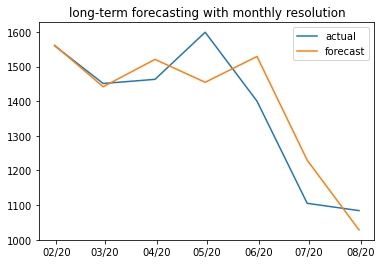

In [ ]:
import matplotlib.dates as mdates

# plot baseline and predictions
time=data.index[-7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,weighted_inv_yhat,label='forecast')
plt.title('long-term forecasting with monthly resolution')
plt.legend()
locator = mdates.AutoDateLocator()
fmt = mdates.DateFormatter('%m/%y')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[:3], weighted_inv_yhat[:3])

Evaluation metric results:-
MSE is : 1138.1320034159335
MAE is : 22.815226012286455
RMSE is : 33.73621204901246
MAPE is : 1.5593148168006685 %
R2 is : 0.5221056251402725

SMAPE is : 0.5071402112461474

MASE is : 0.37711117375680087


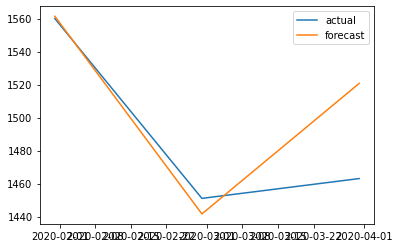

In [ ]:
# plot baseline and predictions
time=data.index[-7:][:3]
plt.plot(time,inv_y[:3],label='actual')
plt.plot(time,weighted_inv_yhat[:3],label='forecast')
plt.legend()
plt.show()

# **simple average ensembling**

In [ ]:
timeseries_evaluation_metrics_func(inv_y, simple_inv_yhat)

Evaluation metric results:-
MSE is : 8552.569262180814
MAE is : 75.540309778475
RMSE is : 92.48010197972758
MAPE is : 5.69263855718126 %
R2 is : 0.7660780265657878

SMAPE is : 0.7787301746760417

MASE is : 0.5871008532005828


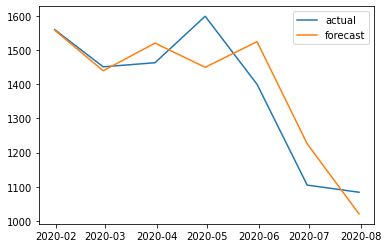

In [ ]:
# plot baseline and predictions
time=data.index[-7:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,simple_inv_yhat,label='forecast')
plt.legend()
plt.show()

In [ ]:
timeseries_evaluation_metrics_func(inv_y[:3], simple_inv_yhat[:3])

Evaluation metric results:-
MSE is : 1141.6770333191182
MAE is : 23.548458137006946
RMSE is : 33.78871162561719
MAPE is : 1.6092751686259565 %
R2 is : 0.5206170896765856

SMAPE is : 0.5237615610342825

MASE is : 0.3892307130083793


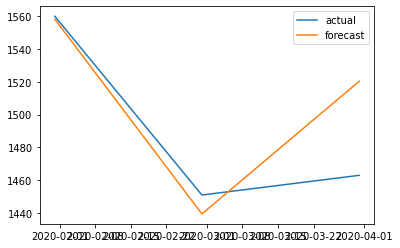

In [ ]:
# plot baseline and predictions
time=data.index[-7:][:3]
plt.plot(time,inv_y[:3],label='actual')
plt.plot(time,simple_inv_yhat[:3],label='forecast')
plt.legend()
plt.show()